# Contents: <a class="anchor" id="top"></a>
### [Part A: Answering DS Methodology Questions](#p1)
### [Part B: Web Scraping from LinkedIn and Preprocessing](#p2) 
### [Part C: Research Paper Review](#p3) 

# Part A - Reasoning<a class="anchor" id="p1"></a>
[back to top](#top)


**What is the Data Understanding step in the statistics step in the Data Mining Pipeline, and why do we need it?**   
In the Data Understanding step, we aim to learn essential characteristics about the data we have gathered. Understanding the data types of the data attributes allows you to know what kinds of analyses you will be able to perform with that data. E.g., if you have numerical data, you can take averages whereas you cannot do that with categorical data. This step includes visualizing our data. Gaining knowledge of your data is useful for the next step in the data mining pipeline: data preprocessing. 


**What are the measures of central tendency (Ms)? Explain the relevance of each of them with suitable examples.**  
Measures of central tendency aim to generalize the data, or provide an idea of what a typical member of the data set looks like. The three most common measures of central tendancy are Mean, Median, and Mode.  

Mean is the standard average of a group of numerical variables. For example, if you had 5 quizzes over the course of a semester, and you scored a 75%, 80%, 85%, 100%, and 100%, then your average quiz grade for the semester would be an 88%, giving an idea for how well you did on a typical quiz for the course.   

Median gives an alternative measure for the average. The median of a set of numeric data is the value at which 50% of the data are larger and 50% of the data are smaller than that value. For example, the median test grade for a class of 101 students tells us that 50 students got at least the median score and 50 students got at most the median score.  

Mode tells us the most common numeric data value in the set. For example, if we looked at the salary of 100 data analysts in tens of thousands of dollars, one might find that 50 of the 100 had salaries in the 60,000-70,000 dollar range, 30 of the 100 had salaries in the 50,000-60,000 dollar range, and 20 of the 100 had salaries in the 70,000-80,000 dollar range. Then the most common, or mode, salary range would be 60,000-70,000 dollars.


**What are the measures of dispersion? Explain the relevance of each of them with suitable examples.**  
Measures of dispersion tell us about the spread, or distribution, of a set of numerical data. One example of such a measure if the range of the data, or the distance between the smallest and largest value. An example of this could be the difference between the largest and smallest salary for a jobs with the title "Data Analyst". Quantiles tell us the numerical value at which some percent of the data have values smaller than that value, e.g., the 50th quantile is the median of the data. The inter-quartile range (IQR) tells us the values between which 50% of the data points lie. If you were to apply to a data analyst position, with knowledge of this IQR, you could have an expectation of the salary you would earn.  
Other measures of dispersion are the variance and standard deviation. The variance is a measure of  the expected or typical distance-squared between a data point and the mean of the data set. The standard deviation is the square root of the variance, thus measures how far on average a data point is from the mean of the set of data. A small standard deviation tells us that the data tend to be close to the mean. For example, in certain neighborhoods, we may find that the incomes of the inhabitants may all be very similar to eachother.  


**What are the measures of similarity? Explain the relevance of each of them with suitable examples.**  
Measures of similarity assess how alike or unalike data points are in comparison to one another, and depend on the data types in question. No matter the data type though, we can store information about similarity in a similarity matrix: a square matrix where each data point has a row and a column, and the intersection between each row and column holds a value describing the similarity between the two data points. The values along the diagonal of this matrix are always 1, because data points are perfectly similar to themselves.  

If our data are nominal (aka categorical), we would measure the similarity between two data points by checking whether their values are equal. We would then assign either a 1 or 0 to the intersection value between the two data points.  

If our data are binary variables, we can measure the similarity between two data points via symmetric or assymetric binary dissimilarity. This measure is referred to as the Jaccard coefficient. This can be calculated by summing the number of binary attributes a pair of data points have equal values in. For example, if doctors were trying to determine whether three patients at the hospital were suffering from the same or different diseases, they could perform 10 binary tests on the patients. If two of the patients both tested positive on 6 of the 10 tests, negative on 3, and their results were different for the 1 remaining test, this pair of patients would have a dissimilarity score of 1/6=0.167. This relatively small score indicates that the patients are likely suffering from the same illness. 

If our data are numeric, we can measure their similarity using the L_2 norm, i.e. Euclidean distance. This is the square root of the sum of the squares of the differences between each numeric attribute between two data points. This is the same way you measure the proximity between two points on a two dimensional graph. For example, if you wanted to know how similar two football players were according to height and weight, you could use the L_2 norm. Other ways to measure similarity of numeric data are the Manhattan distance, and Minkowski distance. 

# Part B - Application<a class="anchor" id="p2"></a>
[back to top](#top)


### Scraping Job Data from LinkedIn

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [92]:
df = pd.DataFrame({'Job Title':[], 'Company': [], 'Location':[], 'Post Date':[], 'Days Since Post':[]})

In [93]:
URL = 'https://www.linkedin.com/jobs/search/?currentJobId=3780543797&distance=25&f_E=1%2C2&geoId=103112676&keywords=data&origin=JOBS_HOME_KEYWORD_HISTORY&refresh=true&start='
for i in range(10):
    url2 = URL + str(25*i)
    page = requests.get(url2)
    page_soup = BeautifulSoup(page.content, "html.parser")
    
    # retrieve job info from soup
    jobs = page_soup.find_all("div", {"class": "base-search-card__info"})
    for job in jobs:
        title = job.find('h3').string.strip()
        company = job.find('h4').find('a').string.strip()
        location = job.find('span', {'class': "job-search-card__location"}).string.strip()
        post_date = job.find('time')['datetime']
        date_diff = pd.to_datetime('today').normalize() - pd.to_datetime(post_date)
        num_days = date_diff.days
        
        # add info to dataframe
        new_row = [title, company, location, post_date, num_days]
        df.loc[len(df.index)] = new_row

In [94]:
df.head()

,Job Title,Company,Location,Post Date,Days Since Post
0,Admissions Associate,Saint Ignatius College Prep,"Chicago, IL",2024-01-30,2.0
1,Data Analyst,Lever Middleware Test Company 2,"Chicago, IL",2023-12-15,48.0
2,Jr Data Entry Assistant (No Experience),Sitters Match,"Chicago, IL",2024-01-18,14.0
3,Customer Experience Specialist,Air Canada,"Chicago, IL",2023-08-01,184.0
4,"Assistant, Data Entry (Part-Time) | Remote",Sitters Match,"Chicago, IL",2024-01-27,5.0


In [49]:
df.to_csv('scraped_linkedin_jobs.csv')

### Data Processing

In [82]:
jobsdf = pd.read_csv('scraped_linkedin_jobs.csv')

In [83]:
jobsdf.head()

,Unnamed: 0,Job Title,Company,Location,Post Date,Days Since Post
0,0,Admissions Associate,Saint Ignatius College Prep,"Chicago, IL",2024-01-30,2.0
1,1,Data Analyst,Lever Middleware Test Company 2,"Chicago, IL",2023-12-15,48.0
2,2,Jr Data Entry Assistant (No Experience),Sitters Match,"Chicago, IL",2024-01-18,14.0
3,3,Customer Experience Specialist,Air Canada,"Chicago, IL",2023-08-01,184.0
4,4,Data,Lever Middleware Test Company 2,"Chicago, IL",2023-12-15,48.0


In [84]:
# remove first column
jobsdf.drop(jobsdf.columns[0], axis=1, inplace=True)
jobsdf.head()

,Job Title,Company,Location,Post Date,Days Since Post
0,Admissions Associate,Saint Ignatius College Prep,"Chicago, IL",2024-01-30,2.0
1,Data Analyst,Lever Middleware Test Company 2,"Chicago, IL",2023-12-15,48.0
2,Jr Data Entry Assistant (No Experience),Sitters Match,"Chicago, IL",2024-01-18,14.0
3,Customer Experience Specialist,Air Canada,"Chicago, IL",2023-08-01,184.0
4,Data,Lever Middleware Test Company 2,"Chicago, IL",2023-12-15,48.0


In [85]:
# add columns
def title_contains(title, keyword):
    return int(keyword.lower() in title.lower())

jobsdf['Analyst Role'] = jobsdf['Job Title'].apply(title_contains, args=['analyst'])
jobsdf['Data Role'] = jobsdf['Job Title'].apply(title_contains, args=['data'])
jobsdf['Scientist Role'] = jobsdf['Job Title'].apply(title_contains, args=['scientist'])
jobsdf['Intern Role'] = jobsdf['Job Title'].apply(title_contains, args=['intern'])

In [86]:
jobsdf.head()

,Job Title,Company,Location,Post Date,Days Since Post,Analyst Role,Data Role,Scientist Role,Intern Role
0,Admissions Associate,Saint Ignatius College Prep,"Chicago, IL",2024-01-30,2.0,0,0,0,0
1,Data Analyst,Lever Middleware Test Company 2,"Chicago, IL",2023-12-15,48.0,1,1,0,0
2,Jr Data Entry Assistant (No Experience),Sitters Match,"Chicago, IL",2024-01-18,14.0,0,1,0,0
3,Customer Experience Specialist,Air Canada,"Chicago, IL",2023-08-01,184.0,0,0,0,0
4,Data,Lever Middleware Test Company 2,"Chicago, IL",2023-12-15,48.0,0,1,0,0


In [87]:
# 2. Basic Info
jobsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Job Title        250 non-null    object 
 1   Company          250 non-null    object 
 2   Location         250 non-null    object 
 3   Post Date        250 non-null    object 
 4   Days Since Post  250 non-null    float64
 5   Analyst Role     250 non-null    int64  
 6   Data Role        250 non-null    int64  
 7   Scientist Role   250 non-null    int64  
 8   Intern Role      250 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 17.7+ KB


In [91]:
# 3. For a categorical attribute: Value counts
jobsdf['Company'].value_counts()

Sitters Match                                           135
Jobconversion                                            35
Lever Middleware Test Company 2                          16
fairlife, LLC                                            10
Redwood Logistics                                         8
Saint Ignatius College Prep                               8
Air Canada                                                8
Chicago Bulls                                             7
FreedomRoads                                              4
University of Chicago                                     2
Your Perfect Match                                        1
SynergisticIT                                             1
AdTheorent                                                1
Loop Capital                                              1
Phaidon International                                     1
UChicago Medicine                                         1
Fooda                                   

In [98]:
jobsdf.shape[0]

250

In [99]:
# 3. For a binary attribute: Value counts and proportions

total_jobs = jobsdf.shape[0]

num_analyst_roles = jobsdf['Analyst Role'].sum()
print('Number of Analyst Roles:', num_analyst_roles)
print('Proportion of Analyst Roles:', num_analyst_roles/total_jobs)
print()

num_data_roles = jobsdf['Data Role'].sum()
print('Number of Data Roles:', num_data_roles)
print('Proportion of Data Roles:', num_data_roles/total_jobs)
print()

num_scientist_roles = jobsdf['Scientist Role'].sum()
print('Number of Scientist Roles:', num_scientist_roles)
print('Proportion of Scientist Roles:', num_scientist_roles/total_jobs)
print()

num_intern_roles = jobsdf['Intern Role'].sum()
print('Number of Intern Roles:', num_intern_roles)
print('Proportion of Intern Roles:', num_intern_roles/total_jobs)

Number of Analyst Roles: 15
Proportion of Analyst Roles: 0.06

Number of Data Roles: 218
Proportion of Data Roles: 0.872

Number of Scientist Roles: 12
Proportion of Scientist Roles: 0.048

Number of Intern Roles: 7
Proportion of Intern Roles: 0.028


In [100]:
# 4. For a numerical attribute: Data basics: Min, Max

min_days = jobsdf['Days Since Post'].min()
max_days = jobsdf['Days Since Post'].max()
avg_days = jobsdf['Days Since Post'].mean()

print('Least Number of Days Since Post', min_days)
print()
print('Largest Number of Days Since Post', max_days)
print()
print('Average Number of Days Since Post', avg_days)

Least Number of Days Since Post 0.0

Largest Number of Days Since Post 202.0

Average Number of Days Since Post 28.476


In [105]:
# 5. Data Central Tendency: Mean, Median, Mode

median = jobsdf['Days Since Post'].median()
most_common = jobsdf['Days Since Post'].mode()[0]

print('Median Number of Days Since Post', median)
print()
print('Most Common Number of Days Since Post', most_common)

Median Number of Days Since Post 12.0

Most Common Number of Days Since Post 14.0


In [113]:
# 6. Data Dispersion: Range, MidRange, Quartiles, IQR, Variance, Std.

col = 'Days Since Post'
rang = jobsdf[col].max() - jobsdf[col].min()
quantiles = jobsdf[col].quantile([.25, .5, .75])
IQR = quantiles[.75] - quantiles[.25]
var = jobsdf[col].var()
std = jobsdf[col].std()
print(col, '\nRange:', rang, '\nIQR:', IQR, '\nVariance:', var, '\nStandard Deviation:', std)

Days Since Post 
Range: 202.0 
IQR: 43.0 
Variance: 1738.1620722891585 
Standard Deviation: 41.69127093636219


<AxesSubplot:>

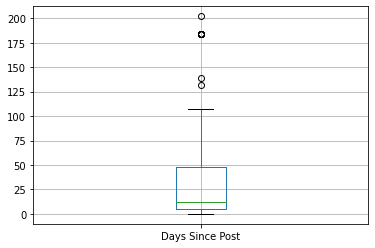

In [119]:
# 6. Outliers
col = 'Days Since Post'
jobsdf.boxplot(col)

# Part C - Reading<a class="anchor" id="p3"></a>
[back to top](#top)


**What problem is addressed? Why is the problem important and challenging?**  
The problem being addressed is the lack of appreciation for the importance of exploratory data analysis (EDA) in data science and statistical modeling. Among other things, the author argues that EDA is crucial to assessing whether data meet the assumptions necessary for inferential statistics. There can be grave consequences in drawing inferences from data that have not met the theoretical assumptions. EDA helps to solve the challenge of working with real world data, which in contrast to data generated in a controlled lab environment, may be contaminated with noise and/or bias. Furthermore, when researchers are face to face with the vast amounts of available data, EDA can help them learn which questions to ask. 

**A high-level, brief description of the proposed solution (no need to include the details).**  
The author provides examples which motivate the need for EDA, and illustrate the vital role it plays in data science and statistics. With an emphasis on data visualization, EDA allows one to understand the general shape of the data at hand, as well as pick out details within the data. This method therefore helps modelers visualize signal and noise within their data. 

**Discuss in detail one point with the author on which you agree most. What is it, and why do you agree with the author?**  
I agree with the author that data visualization, a major aspect of EDA, is more engaging for an audience than looking at tables of numbers. Holding the attention of an audience which you are making an argument to can have a profound impact on the effectiveness of your presentation. 